<a href="https://colab.research.google.com/github/nfrn/ComputerVisionHandsOn/blob/main/Forma%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/nfrn/ComputerVisionHandsOn.git
!unzip /content/ComputerVisionHandsOn/maskdataset.zip -d ComputerVisionHandsOn

Cloning into 'ComputerVisionHandsOn'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.
Archive:  /content/ComputerVisionHandsOn/maskdataset.zip
 extracting: ComputerVisionHandsOn/test/w1240-p16x9-2019-10-04t075956z_1862636027_rc15d4d49d00_rtrmadp_3_hongkong-protests_jpg.rf.a9a2c2a1cb13c980b339065d2324ea7d.jpg  
 extracting: ComputerVisionHandsOn/train/11893820-3x2-xlarge_jpg.rf.1529b09bfee7d069f677ff513f6249eb.jpg  
 extracting: ComputerVisionHandsOn/train/130624011830-malaysia-smog-students-horizontal-large-gallery_jpg.rf.1d1478ec7b2667aa240401f636d513c4.jpg  
 extracting: ComputerVisionHandsOn/test/126202-untitled-design-13_jpg.rf.baa3d2e55d469ae5d5d4cd81c4603e1d.jpg  
 extracting: ComputerVisionHandsOn/test/r1p00017o8171pnq407_jpg.rf.d21dd91220d3df7763f7d572f3d95863.jpg  
 extracting: ComputerVisio

In [4]:
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3747, done.
remote: Total 3747 (delta 0), reused 0 (delta 0), pack-reused 3747
Receiving objects: 100% (3747/3747), 132.20 MiB | 34.63 MiB/s, done.
Resolving deltas: 100% (800/800), done.
Checking out files: 100% (4032/4032), done.
     |████████████████████████████████| 352.6 MB 13 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=85bb2aad8bd58611f9bdc3cc4e275e80dde28e0a296465629f569366b98b515d
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-cj24rx23/pycocotools_6746d58da26b4d48ba5167c156409f7f
  Running command git clone -q https://github.com/abhi-kumar

In [5]:
#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later! 
!pip install efficientnet_pytorch
!pip install tensorboardX

     \ 91 kB 5.4 MB/s
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47878 sha256=f497ddd9dd5fe4770cd7f038df7a818ad7e213742eff1847d40d110fa9fcf075
  Stored in directory: /tmp/pip-ephem-wheel-cache-kyinrzr9/wheels/b5/36/d9/593e7ac06d343d0a32138fa6c402dc3a0bd31442c9fe53f76c
Successfully built tqdm
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.0
    Uninstalling tqdm-4.62.0:
      Successfully uninstalled tqdm-4.62.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.28.1 which is incompatible.
panel 0.12.1 requires tqdm>=4.48.0, but you have tqdm 4.28.1 which is incompatible.
fbprophet 0.7.1 requires tqdm>=4.36.1, but you have tqdm 4.28.1 which is incompatible.
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl

In [6]:
!mkdir Masks
!mkdir Masks/Train
!mkdir Masks/Train/annotations
!mkdir Masks/Train/Annotations
!mkdir Masks/Train/Images

!mkdir Masks/Validation
!mkdir Masks/Validation/annotations
!mkdir Masks/Validation/Annotations
!mkdir Masks/Validation/Images

!mkdir Masks/Test
!mkdir Masks/Test/annotations
!mkdir Masks/Test/Annotations
!mkdir Masks/Test/Images

In [7]:
%ls

ComputerVisionHandsOn/  Masks/  Monk_Object_Detection/  sample_data/


In [8]:
%cp ComputerVisionHandsOn/train/_annotations.coco.json Masks/Train/annotations/instances_Images.json
%cp ComputerVisionHandsOn/train/*.jpg Masks/Train/Images/

%cp ComputerVisionHandsOn/valid/_annotations.coco.json Masks/Validation/annotations/instances_Images.json
%cp ComputerVisionHandsOn/valid/*.jpg Masks/Validation/Images/

%cp ComputerVisionHandsOn/test/_annotations.coco.json Masks/Test/annotations/instances_Images.json
%cp ComputerVisionHandsOn/test/*.jpg Masks/Test/Images/

In [9]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [10]:
from train_detector import Detector

In [11]:
gtf = Detector();

In [12]:
#directs the model towards file structure
root_dir = "./";
coco_dir = "Masks/Train";
img_dir = "./";
set_dir = "Images"; 
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [15]:
#directs the model towards file structure
root_dir = "./";
coco_dir = "Masks/Validation";
img_dir = "./";
set_dir = "Images"; 
gtf.Val_Dataset(root_dir, coco_dir, img_dir, set_dir) 

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [16]:
gtf.Model();

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


In [17]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [18]:
%%time
gtf.Train(num_epochs=30, model_output_dir="trained/");

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1/30. Iteration: 1/13. Cls loss: 1.13047. Reg loss: 1.04242. Batch loss: 2.17289 Total loss: 2.17289
Epoch: 1/30. Iteration: 2/13. Cls loss: 1.12156. Reg loss: 1.06782. Batch loss: 2.18938 Total loss: 2.18113
Epoch: 1/30. Iteration: 3/13. Cls loss: 1.11379. Reg loss: 1.02678. Batch loss: 2.14056 Total loss: 2.16761
Epoch: 1/30. Iteration: 4/13. Cls loss: 1.10566. Reg loss: 1.02723. Batch loss: 2.13289 Total loss: 2.15893
Epoch: 1/30. Iteration: 5/13. Cls loss: 1.09265. Reg loss: 1.02692. Batch loss: 2.11957 Total loss: 2.15106
Epoch: 1/30. Iteration: 6/13. Cls loss: 1.08087. Reg loss: 1.02572. Batch loss: 2.10659 Total loss: 2.14365
Epoch: 1/30. Iteration: 7/13. Cls loss: 1.06572. Reg loss: 0.97649. Batch loss: 2.04220 Total loss: 2.12916
Epoch: 1/30. Iteration: 8/13. Cls loss: 1.04346. Reg loss: 0.94809. Batch loss: 1.99155 Total loss: 2.11196
Epoch: 1/30. Iteration: 9/13. Cls loss: 1.02522. Reg loss: 0.96869. Batch loss: 1.99392 Total loss: 2.09884
Epoch: 1/30. Iteration: 10/1

Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  if len(inputs) == 2:
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  image_shape = np.array(image_shape)
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might caus

Epoch: 2/30. Iteration: 1/13. Cls loss: 0.87260. Reg loss: 0.89545. Batch loss: 1.76806 Total loss: 1.76806
Epoch: 2/30. Iteration: 2/13. Cls loss: 0.84895. Reg loss: 0.91536. Batch loss: 1.76432 Total loss: 1.76619
Epoch: 2/30. Iteration: 3/13. Cls loss: 0.77789. Reg loss: 0.89489. Batch loss: 1.67278 Total loss: 1.73505
Epoch: 2/30. Iteration: 4/13. Cls loss: 0.72058. Reg loss: 0.94149. Batch loss: 1.66207 Total loss: 1.71681
Epoch: 2/30. Iteration: 5/13. Cls loss: 0.66454. Reg loss: 0.95341. Batch loss: 1.61795 Total loss: 1.69703
Epoch: 2/30. Iteration: 6/13. Cls loss: 0.61890. Reg loss: 0.90967. Batch loss: 1.52857 Total loss: 1.66896
Epoch: 2/30. Iteration: 7/13. Cls loss: 0.63736. Reg loss: 0.90215. Batch loss: 1.53950 Total loss: 1.65046
Epoch: 2/30. Iteration: 8/13. Cls loss: 0.53636. Reg loss: 0.92571. Batch loss: 1.46207 Total loss: 1.62691
Epoch: 2/30. Iteration: 9/13. Cls loss: 0.58608. Reg loss: 0.88547. Batch loss: 1.47154 Total loss: 1.60965
Epoch: 2/30. Iteration: 10/1

Epoch: 3/30. Iteration: 1/13. Cls loss: 0.66468. Reg loss: 0.88928. Batch loss: 1.55395 Total loss: 1.55395
Epoch: 3/30. Iteration: 2/13. Cls loss: 0.58946. Reg loss: 0.86997. Batch loss: 1.45943 Total loss: 1.50669
Epoch: 3/30. Iteration: 3/13. Cls loss: 0.53465. Reg loss: 0.88352. Batch loss: 1.41817 Total loss: 1.47718
Epoch: 3/30. Iteration: 4/13. Cls loss: 0.51810. Reg loss: 0.86825. Batch loss: 1.38634 Total loss: 1.45447
Epoch: 3/30. Iteration: 5/13. Cls loss: 0.55298. Reg loss: 0.85654. Batch loss: 1.40952 Total loss: 1.44548
Epoch: 3/30. Iteration: 6/13. Cls loss: 0.58126. Reg loss: 0.90083. Batch loss: 1.48210 Total loss: 1.45158
Epoch: 3/30. Iteration: 7/13. Cls loss: 0.54649. Reg loss: 0.89878. Batch loss: 1.44527 Total loss: 1.45068
Epoch: 3/30. Iteration: 8/13. Cls loss: 0.54266. Reg loss: 0.85808. Batch loss: 1.40074 Total loss: 1.44444
Epoch: 3/30. Iteration: 9/13. Cls loss: 0.56507. Reg loss: 0.88163. Batch loss: 1.44670 Total loss: 1.44469
Epoch: 3/30. Iteration: 10/1

Epoch: 4/30. Iteration: 1/13. Cls loss: 0.61245. Reg loss: 0.85265. Batch loss: 1.46510 Total loss: 1.46510
Epoch: 4/30. Iteration: 2/13. Cls loss: 0.47993. Reg loss: 0.83078. Batch loss: 1.31071 Total loss: 1.38791
Epoch: 4/30. Iteration: 3/13. Cls loss: 0.50341. Reg loss: 0.86979. Batch loss: 1.37320 Total loss: 1.38300
Epoch: 4/30. Iteration: 4/13. Cls loss: 0.55644. Reg loss: 0.86461. Batch loss: 1.42105 Total loss: 1.39252
Epoch: 4/30. Iteration: 5/13. Cls loss: 0.50510. Reg loss: 0.82711. Batch loss: 1.33221 Total loss: 1.38045
Epoch: 4/30. Iteration: 6/13. Cls loss: 0.52300. Reg loss: 0.85465. Batch loss: 1.37765 Total loss: 1.37999
Epoch: 4/30. Iteration: 7/13. Cls loss: 0.48146. Reg loss: 0.86576. Batch loss: 1.34722 Total loss: 1.37531
Epoch: 4/30. Iteration: 8/13. Cls loss: 0.48366. Reg loss: 0.85309. Batch loss: 1.33674 Total loss: 1.37049
Epoch: 4/30. Iteration: 9/13. Cls loss: 0.46387. Reg loss: 0.86756. Batch loss: 1.33143 Total loss: 1.36615
Epoch: 4/30. Iteration: 10/1

Epoch: 5/30. Iteration: 1/13. Cls loss: 0.49945. Reg loss: 0.87833. Batch loss: 1.37778 Total loss: 1.37778
Epoch: 5/30. Iteration: 2/13. Cls loss: 0.43277. Reg loss: 0.81855. Batch loss: 1.25132 Total loss: 1.31455
Epoch: 5/30. Iteration: 3/13. Cls loss: 0.41217. Reg loss: 0.79393. Batch loss: 1.20611 Total loss: 1.27840
Epoch: 5/30. Iteration: 4/13. Cls loss: 0.45137. Reg loss: 0.80675. Batch loss: 1.25812 Total loss: 1.27333
Epoch: 5/30. Iteration: 5/13. Cls loss: 0.48480. Reg loss: 0.78835. Batch loss: 1.27315 Total loss: 1.27330
Epoch: 5/30. Iteration: 6/13. Cls loss: 0.39745. Reg loss: 0.79200. Batch loss: 1.18945 Total loss: 1.25932
Epoch: 5/30. Iteration: 7/13. Cls loss: 0.41428. Reg loss: 0.75897. Batch loss: 1.17324 Total loss: 1.24703
Epoch: 5/30. Iteration: 8/13. Cls loss: 0.37065. Reg loss: 0.78365. Batch loss: 1.15430 Total loss: 1.23544
Epoch: 5/30. Iteration: 9/13. Cls loss: 0.41217. Reg loss: 0.79661. Batch loss: 1.20878 Total loss: 1.23247
Epoch: 5/30. Iteration: 10/1

Epoch: 6/30. Iteration: 1/13. Cls loss: 0.40609. Reg loss: 0.72654. Batch loss: 1.13263 Total loss: 1.13263
Epoch: 6/30. Iteration: 2/13. Cls loss: 0.35828. Reg loss: 0.69424. Batch loss: 1.05252 Total loss: 1.09257
Epoch: 6/30. Iteration: 3/13. Cls loss: 0.35875. Reg loss: 0.71198. Batch loss: 1.07073 Total loss: 1.08529
Epoch: 6/30. Iteration: 4/13. Cls loss: 0.38224. Reg loss: 0.70449. Batch loss: 1.08673 Total loss: 1.08565
Epoch: 6/30. Iteration: 5/13. Cls loss: 0.35972. Reg loss: 0.70069. Batch loss: 1.06041 Total loss: 1.08060
Epoch: 6/30. Iteration: 6/13. Cls loss: 0.37399. Reg loss: 0.69807. Batch loss: 1.07206 Total loss: 1.07918
Epoch: 6/30. Iteration: 7/13. Cls loss: 0.39352. Reg loss: 0.72201. Batch loss: 1.11553 Total loss: 1.08437
Epoch: 6/30. Iteration: 8/13. Cls loss: 0.41694. Reg loss: 0.71968. Batch loss: 1.13662 Total loss: 1.09090
Epoch: 6/30. Iteration: 9/13. Cls loss: 0.34421. Reg loss: 0.67826. Batch loss: 1.02247 Total loss: 1.08330
Epoch: 6/30. Iteration: 10/1

Epoch: 7/30. Iteration: 1/13. Cls loss: 0.36671. Reg loss: 0.62843. Batch loss: 0.99514 Total loss: 0.99514
Epoch: 7/30. Iteration: 2/13. Cls loss: 0.33842. Reg loss: 0.70942. Batch loss: 1.04784 Total loss: 1.02149
Epoch: 7/30. Iteration: 3/13. Cls loss: 0.34807. Reg loss: 0.70231. Batch loss: 1.05038 Total loss: 1.03112
Epoch: 7/30. Iteration: 4/13. Cls loss: 0.34054. Reg loss: 0.63989. Batch loss: 0.98043 Total loss: 1.01845
Epoch: 7/30. Iteration: 5/13. Cls loss: 0.34754. Reg loss: 0.62456. Batch loss: 0.97210 Total loss: 1.00918
Epoch: 7/30. Iteration: 6/13. Cls loss: 0.33324. Reg loss: 0.64025. Batch loss: 0.97349 Total loss: 1.00323
Epoch: 7/30. Iteration: 7/13. Cls loss: 0.41073. Reg loss: 0.68202. Batch loss: 1.09275 Total loss: 1.01602
Epoch: 7/30. Iteration: 8/13. Cls loss: 0.39041. Reg loss: 0.66201. Batch loss: 1.05242 Total loss: 1.02057
Epoch: 7/30. Iteration: 9/13. Cls loss: 0.36895. Reg loss: 0.65717. Batch loss: 1.02613 Total loss: 1.02119
Epoch: 7/30. Iteration: 10/1

Epoch: 8/30. Iteration: 1/13. Cls loss: 0.35661. Reg loss: 0.63519. Batch loss: 0.99180 Total loss: 0.99180
Epoch: 8/30. Iteration: 2/13. Cls loss: 0.41080. Reg loss: 0.70772. Batch loss: 1.11852 Total loss: 1.05516
Epoch: 8/30. Iteration: 3/13. Cls loss: 0.37164. Reg loss: 0.54778. Batch loss: 0.91942 Total loss: 1.00991
Epoch: 8/30. Iteration: 4/13. Cls loss: 0.30676. Reg loss: 0.61564. Batch loss: 0.92240 Total loss: 0.98804
Epoch: 8/30. Iteration: 5/13. Cls loss: 0.38204. Reg loss: 0.59035. Batch loss: 0.97239 Total loss: 0.98491
Epoch: 8/30. Iteration: 6/13. Cls loss: 0.36409. Reg loss: 0.61243. Batch loss: 0.97652 Total loss: 0.98351
Epoch: 8/30. Iteration: 7/13. Cls loss: 0.31297. Reg loss: 0.60749. Batch loss: 0.92046 Total loss: 0.97450
Epoch: 8/30. Iteration: 8/13. Cls loss: 0.32358. Reg loss: 0.58194. Batch loss: 0.90552 Total loss: 0.96588
Epoch: 8/30. Iteration: 9/13. Cls loss: 0.35949. Reg loss: 0.61186. Batch loss: 0.97136 Total loss: 0.96649
Epoch: 8/30. Iteration: 10/1

Epoch: 9/30. Iteration: 1/13. Cls loss: 0.33325. Reg loss: 0.57180. Batch loss: 0.90505 Total loss: 0.90505
Epoch: 9/30. Iteration: 2/13. Cls loss: 0.35604. Reg loss: 0.61891. Batch loss: 0.97494 Total loss: 0.94000
Epoch: 9/30. Iteration: 3/13. Cls loss: 0.28099. Reg loss: 0.61925. Batch loss: 0.90024 Total loss: 0.92674
Epoch: 9/30. Iteration: 4/13. Cls loss: 0.28989. Reg loss: 0.55848. Batch loss: 0.84836 Total loss: 0.90715
Epoch: 9/30. Iteration: 5/13. Cls loss: 0.31744. Reg loss: 0.58962. Batch loss: 0.90706 Total loss: 0.90713
Epoch: 9/30. Iteration: 6/13. Cls loss: 0.28663. Reg loss: 0.58217. Batch loss: 0.86880 Total loss: 0.90074
Epoch: 9/30. Iteration: 7/13. Cls loss: 0.31777. Reg loss: 0.63639. Batch loss: 0.95416 Total loss: 0.90837
Epoch: 9/30. Iteration: 8/13. Cls loss: 0.32545. Reg loss: 0.56580. Batch loss: 0.89124 Total loss: 0.90623
Epoch: 9/30. Iteration: 9/13. Cls loss: 0.30278. Reg loss: 0.61484. Batch loss: 0.91762 Total loss: 0.90750
Epoch: 9/30. Iteration: 10/1

Epoch: 10/30. Iteration: 1/13. Cls loss: 0.32944. Reg loss: 0.57749. Batch loss: 0.90693 Total loss: 0.90693
Epoch: 10/30. Iteration: 2/13. Cls loss: 0.31218. Reg loss: 0.61091. Batch loss: 0.92310 Total loss: 0.91501
Epoch: 10/30. Iteration: 3/13. Cls loss: 0.25291. Reg loss: 0.55128. Batch loss: 0.80419 Total loss: 0.87807
Epoch: 10/30. Iteration: 4/13. Cls loss: 0.33562. Reg loss: 0.58406. Batch loss: 0.91968 Total loss: 0.88847
Epoch: 10/30. Iteration: 5/13. Cls loss: 0.32517. Reg loss: 0.60002. Batch loss: 0.92519 Total loss: 0.89582
Epoch: 10/30. Iteration: 6/13. Cls loss: 0.33315. Reg loss: 0.61647. Batch loss: 0.94962 Total loss: 0.90478
Epoch: 10/30. Iteration: 7/13. Cls loss: 0.24664. Reg loss: 0.51206. Batch loss: 0.75871 Total loss: 0.88392
Epoch: 10/30. Iteration: 8/13. Cls loss: 0.25041. Reg loss: 0.53183. Batch loss: 0.78224 Total loss: 0.87121
Epoch: 10/30. Iteration: 9/13. Cls loss: 0.26180. Reg loss: 0.51222. Batch loss: 0.77402 Total loss: 0.86041
Epoch: 10/30. Itera

Epoch: 11/30. Iteration: 1/13. Cls loss: 0.28736. Reg loss: 0.59742. Batch loss: 0.88478 Total loss: 0.88478
Epoch: 11/30. Iteration: 2/13. Cls loss: 0.23793. Reg loss: 0.52835. Batch loss: 0.76628 Total loss: 0.82553
Epoch: 11/30. Iteration: 3/13. Cls loss: 0.22159. Reg loss: 0.47545. Batch loss: 0.69704 Total loss: 0.78270
Epoch: 11/30. Iteration: 4/13. Cls loss: 0.27886. Reg loss: 0.56397. Batch loss: 0.84283 Total loss: 0.79774
Epoch: 11/30. Iteration: 5/13. Cls loss: 0.24871. Reg loss: 0.54273. Batch loss: 0.79144 Total loss: 0.79648
Epoch: 11/30. Iteration: 6/13. Cls loss: 0.27059. Reg loss: 0.55475. Batch loss: 0.82534 Total loss: 0.80129
Epoch: 11/30. Iteration: 7/13. Cls loss: 0.32522. Reg loss: 0.58220. Batch loss: 0.90742 Total loss: 0.81645
Epoch: 11/30. Iteration: 8/13. Cls loss: 0.30944. Reg loss: 0.55655. Batch loss: 0.86599 Total loss: 0.82264
Epoch: 11/30. Iteration: 9/13. Cls loss: 0.30520. Reg loss: 0.59251. Batch loss: 0.89771 Total loss: 0.83098
Epoch: 11/30. Itera

Epoch: 12/30. Iteration: 1/13. Cls loss: 0.28233. Reg loss: 0.52633. Batch loss: 0.80866 Total loss: 0.80866
Epoch: 12/30. Iteration: 2/13. Cls loss: 0.24048. Reg loss: 0.47942. Batch loss: 0.71990 Total loss: 0.76428
Epoch: 12/30. Iteration: 3/13. Cls loss: 0.29541. Reg loss: 0.55004. Batch loss: 0.84545 Total loss: 0.79134
Epoch: 12/30. Iteration: 4/13. Cls loss: 0.25369. Reg loss: 0.47941. Batch loss: 0.73310 Total loss: 0.77678
Epoch: 12/30. Iteration: 5/13. Cls loss: 0.31141. Reg loss: 0.53538. Batch loss: 0.84678 Total loss: 0.79078
Epoch: 12/30. Iteration: 6/13. Cls loss: 0.35492. Reg loss: 0.60702. Batch loss: 0.96194 Total loss: 0.81930
Epoch: 12/30. Iteration: 7/13. Cls loss: 0.27714. Reg loss: 0.55145. Batch loss: 0.82859 Total loss: 0.82063
Epoch: 12/30. Iteration: 8/13. Cls loss: 0.29686. Reg loss: 0.60725. Batch loss: 0.90411 Total loss: 0.83107
Epoch: 12/30. Iteration: 9/13. Cls loss: 0.25955. Reg loss: 0.55889. Batch loss: 0.81845 Total loss: 0.82966
Epoch: 12/30. Itera

Epoch: 13/30. Iteration: 1/13. Cls loss: 0.26954. Reg loss: 0.57421. Batch loss: 0.84375 Total loss: 0.84375
Epoch: 13/30. Iteration: 2/13. Cls loss: 0.25161. Reg loss: 0.50444. Batch loss: 0.75604 Total loss: 0.79990
Epoch: 13/30. Iteration: 3/13. Cls loss: 0.27179. Reg loss: 0.50974. Batch loss: 0.78153 Total loss: 0.79377
Epoch: 13/30. Iteration: 4/13. Cls loss: 0.25166. Reg loss: 0.46631. Batch loss: 0.71797 Total loss: 0.77482
Epoch: 13/30. Iteration: 5/13. Cls loss: 0.27101. Reg loss: 0.52773. Batch loss: 0.79873 Total loss: 0.77961
Epoch: 13/30. Iteration: 6/13. Cls loss: 0.25674. Reg loss: 0.47919. Batch loss: 0.73593 Total loss: 0.77233
Epoch: 13/30. Iteration: 7/13. Cls loss: 0.26030. Reg loss: 0.46104. Batch loss: 0.72134 Total loss: 0.76504
Epoch: 13/30. Iteration: 8/13. Cls loss: 0.37911. Reg loss: 0.56355. Batch loss: 0.94266 Total loss: 0.78724
Epoch: 13/30. Iteration: 9/13. Cls loss: 0.32179. Reg loss: 0.54917. Batch loss: 0.87095 Total loss: 0.79655
Epoch: 13/30. Itera

Epoch: 14/30. Iteration: 1/13. Cls loss: 0.29678. Reg loss: 0.51224. Batch loss: 0.80902 Total loss: 0.80902
Epoch: 14/30. Iteration: 2/13. Cls loss: 0.29391. Reg loss: 0.58915. Batch loss: 0.88306 Total loss: 0.84604
Epoch: 14/30. Iteration: 3/13. Cls loss: 0.22062. Reg loss: 0.46271. Batch loss: 0.68332 Total loss: 0.79180
Epoch: 14/30. Iteration: 4/13. Cls loss: 0.29121. Reg loss: 0.52930. Batch loss: 0.82050 Total loss: 0.79898
Epoch: 14/30. Iteration: 5/13. Cls loss: 0.25505. Reg loss: 0.50248. Batch loss: 0.75753 Total loss: 0.79069
Epoch: 14/30. Iteration: 6/13. Cls loss: 0.22285. Reg loss: 0.47854. Batch loss: 0.70139 Total loss: 0.77581
Epoch: 14/30. Iteration: 7/13. Cls loss: 0.25154. Reg loss: 0.45853. Batch loss: 0.71008 Total loss: 0.76642
Epoch: 14/30. Iteration: 8/13. Cls loss: 0.30934. Reg loss: 0.55501. Batch loss: 0.86436 Total loss: 0.77866
Epoch: 14/30. Iteration: 9/13. Cls loss: 0.27859. Reg loss: 0.52648. Batch loss: 0.80507 Total loss: 0.78159
Epoch: 14/30. Itera

Epoch: 15/30. Iteration: 1/13. Cls loss: 0.27926. Reg loss: 0.50999. Batch loss: 0.78925 Total loss: 0.78925
Epoch: 15/30. Iteration: 2/13. Cls loss: 0.21526. Reg loss: 0.45600. Batch loss: 0.67126 Total loss: 0.73026
Epoch: 15/30. Iteration: 3/13. Cls loss: 0.24864. Reg loss: 0.45979. Batch loss: 0.70843 Total loss: 0.72298
Epoch: 15/30. Iteration: 4/13. Cls loss: 0.24590. Reg loss: 0.48995. Batch loss: 0.73586 Total loss: 0.72620
Epoch: 15/30. Iteration: 5/13. Cls loss: 0.30255. Reg loss: 0.50186. Batch loss: 0.80441 Total loss: 0.74184
Epoch: 15/30. Iteration: 6/13. Cls loss: 0.21744. Reg loss: 0.46781. Batch loss: 0.68525 Total loss: 0.73241
Epoch: 15/30. Iteration: 7/13. Cls loss: 0.22705. Reg loss: 0.45844. Batch loss: 0.68549 Total loss: 0.72571
Epoch: 15/30. Iteration: 8/13. Cls loss: 0.17830. Reg loss: 0.41064. Batch loss: 0.58894 Total loss: 0.70861
Epoch: 15/30. Iteration: 9/13. Cls loss: 0.22750. Reg loss: 0.45992. Batch loss: 0.68742 Total loss: 0.70626
Epoch: 15/30. Itera

Epoch: 16/30. Iteration: 1/13. Cls loss: 0.19674. Reg loss: 0.39626. Batch loss: 0.59300 Total loss: 0.59300
Epoch: 16/30. Iteration: 2/13. Cls loss: 0.19486. Reg loss: 0.40629. Batch loss: 0.60115 Total loss: 0.59708
Epoch: 16/30. Iteration: 3/13. Cls loss: 0.19048. Reg loss: 0.41300. Batch loss: 0.60348 Total loss: 0.59921
Epoch: 16/30. Iteration: 4/13. Cls loss: 0.27314. Reg loss: 0.50310. Batch loss: 0.77624 Total loss: 0.64347
Epoch: 16/30. Iteration: 5/13. Cls loss: 0.19261. Reg loss: 0.42517. Batch loss: 0.61779 Total loss: 0.63833
Epoch: 16/30. Iteration: 6/13. Cls loss: 0.21911. Reg loss: 0.43990. Batch loss: 0.65901 Total loss: 0.64178
Epoch: 16/30. Iteration: 7/13. Cls loss: 0.25275. Reg loss: 0.42489. Batch loss: 0.67764 Total loss: 0.64690
Epoch: 16/30. Iteration: 8/13. Cls loss: 0.22614. Reg loss: 0.40235. Batch loss: 0.62849 Total loss: 0.64460
Epoch: 16/30. Iteration: 9/13. Cls loss: 0.24344. Reg loss: 0.45134. Batch loss: 0.69478 Total loss: 0.65018
Epoch: 16/30. Itera

Epoch: 17/30. Iteration: 1/13. Cls loss: 0.20172. Reg loss: 0.42033. Batch loss: 0.62205 Total loss: 0.62205
Epoch: 17/30. Iteration: 2/13. Cls loss: 0.22857. Reg loss: 0.42657. Batch loss: 0.65514 Total loss: 0.63860
Epoch: 17/30. Iteration: 3/13. Cls loss: 0.19251. Reg loss: 0.31454. Batch loss: 0.50705 Total loss: 0.59475
Epoch: 17/30. Iteration: 4/13. Cls loss: 0.22361. Reg loss: 0.48747. Batch loss: 0.71108 Total loss: 0.62383
Epoch: 17/30. Iteration: 5/13. Cls loss: 0.24290. Reg loss: 0.44831. Batch loss: 0.69121 Total loss: 0.63731
Epoch: 17/30. Iteration: 6/13. Cls loss: 0.20458. Reg loss: 0.38933. Batch loss: 0.59390 Total loss: 0.63007
Epoch: 17/30. Iteration: 7/13. Cls loss: 0.24163. Reg loss: 0.38958. Batch loss: 0.63121 Total loss: 0.63023
Epoch: 17/30. Iteration: 8/13. Cls loss: 0.29271. Reg loss: 0.49028. Batch loss: 0.78298 Total loss: 0.64933
Epoch: 17/30. Iteration: 9/13. Cls loss: 0.24941. Reg loss: 0.45094. Batch loss: 0.70035 Total loss: 0.65500
Epoch: 17/30. Itera

Epoch: 18/30. Iteration: 1/13. Cls loss: 0.26028. Reg loss: 0.52506. Batch loss: 0.78534 Total loss: 0.78534
Epoch: 18/30. Iteration: 2/13. Cls loss: 0.26470. Reg loss: 0.48703. Batch loss: 0.75173 Total loss: 0.76853
Epoch: 18/30. Iteration: 3/13. Cls loss: 0.21625. Reg loss: 0.38165. Batch loss: 0.59789 Total loss: 0.71165
Epoch: 18/30. Iteration: 4/13. Cls loss: 0.20771. Reg loss: 0.35763. Batch loss: 0.56534 Total loss: 0.67507
Epoch: 18/30. Iteration: 5/13. Cls loss: 0.20013. Reg loss: 0.43825. Batch loss: 0.63838 Total loss: 0.66774
Epoch: 18/30. Iteration: 6/13. Cls loss: 0.20270. Reg loss: 0.40509. Batch loss: 0.60779 Total loss: 0.65774
Epoch: 18/30. Iteration: 7/13. Cls loss: 0.25143. Reg loss: 0.36729. Batch loss: 0.61872 Total loss: 0.65217
Epoch: 18/30. Iteration: 8/13. Cls loss: 0.17330. Reg loss: 0.39845. Batch loss: 0.57175 Total loss: 0.64212
Epoch: 18/30. Iteration: 9/13. Cls loss: 0.20580. Reg loss: 0.40261. Batch loss: 0.60841 Total loss: 0.63837
Epoch: 18/30. Itera

Epoch: 19/30. Iteration: 1/13. Cls loss: 0.16831. Reg loss: 0.38382. Batch loss: 0.55212 Total loss: 0.55212
Epoch: 19/30. Iteration: 2/13. Cls loss: 0.21033. Reg loss: 0.38652. Batch loss: 0.59685 Total loss: 0.57449
Epoch: 19/30. Iteration: 3/13. Cls loss: 0.18897. Reg loss: 0.38214. Batch loss: 0.57111 Total loss: 0.57336
Epoch: 19/30. Iteration: 4/13. Cls loss: 0.23274. Reg loss: 0.38724. Batch loss: 0.61998 Total loss: 0.58502
Epoch: 19/30. Iteration: 5/13. Cls loss: 0.24981. Reg loss: 0.43088. Batch loss: 0.68068 Total loss: 0.60415
Epoch: 19/30. Iteration: 6/13. Cls loss: 0.27290. Reg loss: 0.50237. Batch loss: 0.77527 Total loss: 0.63267
Epoch: 19/30. Iteration: 7/13. Cls loss: 0.27262. Reg loss: 0.44387. Batch loss: 0.71649 Total loss: 0.64464
Epoch: 19/30. Iteration: 8/13. Cls loss: 0.26178. Reg loss: 0.38699. Batch loss: 0.64876 Total loss: 0.64516
Epoch: 19/30. Iteration: 9/13. Cls loss: 0.36537. Reg loss: 0.42569. Batch loss: 0.79106 Total loss: 0.66137
Epoch: 19/30. Itera

Epoch: 20/30. Iteration: 1/13. Cls loss: 0.25000. Reg loss: 0.44454. Batch loss: 0.69454 Total loss: 0.69454
Epoch: 20/30. Iteration: 2/13. Cls loss: 0.26196. Reg loss: 0.42577. Batch loss: 0.68773 Total loss: 0.69114
Epoch: 20/30. Iteration: 3/13. Cls loss: 0.20117. Reg loss: 0.35183. Batch loss: 0.55300 Total loss: 0.64509
Epoch: 20/30. Iteration: 4/13. Cls loss: 0.17842. Reg loss: 0.31637. Batch loss: 0.49479 Total loss: 0.60752
Epoch: 20/30. Iteration: 5/13. Cls loss: 0.24965. Reg loss: 0.38922. Batch loss: 0.63887 Total loss: 0.61379
Epoch: 20/30. Iteration: 6/13. Cls loss: 0.20081. Reg loss: 0.39814. Batch loss: 0.59895 Total loss: 0.61132
Epoch: 20/30. Iteration: 7/13. Cls loss: 0.19408. Reg loss: 0.42482. Batch loss: 0.61890 Total loss: 0.61240
Epoch: 20/30. Iteration: 8/13. Cls loss: 0.17721. Reg loss: 0.40933. Batch loss: 0.58654 Total loss: 0.60917
Epoch: 20/30. Iteration: 9/13. Cls loss: 0.17660. Reg loss: 0.42751. Batch loss: 0.60411 Total loss: 0.60861
Epoch: 20/30. Itera

Epoch: 21/30. Iteration: 1/13. Cls loss: 0.17270. Reg loss: 0.34650. Batch loss: 0.51920 Total loss: 0.51920
Epoch: 21/30. Iteration: 2/13. Cls loss: 0.19945. Reg loss: 0.36853. Batch loss: 0.56798 Total loss: 0.54359
Epoch: 21/30. Iteration: 3/13. Cls loss: 0.18030. Reg loss: 0.38744. Batch loss: 0.56773 Total loss: 0.55164
Epoch: 21/30. Iteration: 4/13. Cls loss: 0.19890. Reg loss: 0.42346. Batch loss: 0.62237 Total loss: 0.56932
Epoch: 21/30. Iteration: 5/13. Cls loss: 0.17153. Reg loss: 0.34608. Batch loss: 0.51761 Total loss: 0.55898
Epoch: 21/30. Iteration: 6/13. Cls loss: 0.22096. Reg loss: 0.39083. Batch loss: 0.61180 Total loss: 0.56778
Epoch: 21/30. Iteration: 7/13. Cls loss: 0.17715. Reg loss: 0.38157. Batch loss: 0.55872 Total loss: 0.56649
Epoch: 21/30. Iteration: 8/13. Cls loss: 0.22243. Reg loss: 0.36443. Batch loss: 0.58686 Total loss: 0.56903
Epoch: 21/30. Iteration: 9/13. Cls loss: 0.22743. Reg loss: 0.39133. Batch loss: 0.61877 Total loss: 0.57456
Epoch: 21/30. Itera

Epoch: 22/30. Iteration: 1/13. Cls loss: 0.27401. Reg loss: 0.32838. Batch loss: 0.60239 Total loss: 0.60239
Epoch: 22/30. Iteration: 2/13. Cls loss: 0.18623. Reg loss: 0.30165. Batch loss: 0.48788 Total loss: 0.54514
Epoch: 22/30. Iteration: 3/13. Cls loss: 0.13187. Reg loss: 0.31706. Batch loss: 0.44893 Total loss: 0.51307
Epoch: 22/30. Iteration: 4/13. Cls loss: 0.15107. Reg loss: 0.32678. Batch loss: 0.47785 Total loss: 0.50426
Epoch: 22/30. Iteration: 5/13. Cls loss: 0.22382. Reg loss: 0.44931. Batch loss: 0.67313 Total loss: 0.53803
Epoch: 22/30. Iteration: 6/13. Cls loss: 0.12079. Reg loss: 0.33657. Batch loss: 0.45736 Total loss: 0.52459
Epoch: 22/30. Iteration: 7/13. Cls loss: 0.20070. Reg loss: 0.36996. Batch loss: 0.57066 Total loss: 0.53117
Epoch: 22/30. Iteration: 8/13. Cls loss: 0.30159. Reg loss: 0.42152. Batch loss: 0.72311 Total loss: 0.55516
Epoch: 22/30. Iteration: 9/13. Cls loss: 0.19132. Reg loss: 0.36077. Batch loss: 0.55210 Total loss: 0.55482
Epoch: 22/30. Itera

Epoch: 23/30. Iteration: 1/13. Cls loss: 0.21033. Reg loss: 0.30930. Batch loss: 0.51963 Total loss: 0.51963
Epoch: 23/30. Iteration: 2/13. Cls loss: 0.14209. Reg loss: 0.32217. Batch loss: 0.46426 Total loss: 0.49194
Epoch: 23/30. Iteration: 3/13. Cls loss: 0.23089. Reg loss: 0.37439. Batch loss: 0.60527 Total loss: 0.52972
Epoch: 23/30. Iteration: 4/13. Cls loss: 0.17576. Reg loss: 0.36315. Batch loss: 0.53890 Total loss: 0.53202
Epoch: 23/30. Iteration: 5/13. Cls loss: 0.15211. Reg loss: 0.36447. Batch loss: 0.51658 Total loss: 0.52893
Epoch: 23/30. Iteration: 6/13. Cls loss: 0.18444. Reg loss: 0.30324. Batch loss: 0.48769 Total loss: 0.52206
Epoch: 23/30. Iteration: 7/13. Cls loss: 0.16877. Reg loss: 0.33648. Batch loss: 0.50525 Total loss: 0.51965
Epoch: 23/30. Iteration: 8/13. Cls loss: 0.22450. Reg loss: 0.38900. Batch loss: 0.61350 Total loss: 0.53139
Epoch: 23/30. Iteration: 9/13. Cls loss: 0.37888. Reg loss: 0.46294. Batch loss: 0.84181 Total loss: 0.56588
Epoch: 23/30. Itera

Epoch: 24/30. Iteration: 1/13. Cls loss: 0.22636. Reg loss: 0.41322. Batch loss: 0.63958 Total loss: 0.63958
Epoch: 24/30. Iteration: 2/13. Cls loss: 0.16480. Reg loss: 0.37491. Batch loss: 0.53971 Total loss: 0.58964
Epoch: 24/30. Iteration: 3/13. Cls loss: 0.18803. Reg loss: 0.37249. Batch loss: 0.56052 Total loss: 0.57993
Epoch: 24/30. Iteration: 4/13. Cls loss: 0.22827. Reg loss: 0.39051. Batch loss: 0.61878 Total loss: 0.58964
Epoch: 24/30. Iteration: 5/13. Cls loss: 0.20021. Reg loss: 0.26416. Batch loss: 0.46437 Total loss: 0.56459
Epoch: 24/30. Iteration: 6/13. Cls loss: 0.19225. Reg loss: 0.38057. Batch loss: 0.57282 Total loss: 0.56596
Epoch: 24/30. Iteration: 7/13. Cls loss: 0.17597. Reg loss: 0.30609. Batch loss: 0.48206 Total loss: 0.55398
Epoch: 24/30. Iteration: 8/13. Cls loss: 0.17897. Reg loss: 0.30357. Batch loss: 0.48254 Total loss: 0.54505
Epoch: 24/30. Iteration: 9/13. Cls loss: 0.14053. Reg loss: 0.32256. Batch loss: 0.46309 Total loss: 0.53594
Epoch: 24/30. Itera

Epoch: 25/30. Iteration: 1/13. Cls loss: 0.18782. Reg loss: 0.35468. Batch loss: 0.54250 Total loss: 0.54250
Epoch: 25/30. Iteration: 2/13. Cls loss: 0.19732. Reg loss: 0.29459. Batch loss: 0.49192 Total loss: 0.51721
Epoch: 25/30. Iteration: 3/13. Cls loss: 0.19407. Reg loss: 0.34680. Batch loss: 0.54087 Total loss: 0.52510
Epoch: 25/30. Iteration: 4/13. Cls loss: 0.19241. Reg loss: 0.37501. Batch loss: 0.56742 Total loss: 0.53568
Epoch: 25/30. Iteration: 5/13. Cls loss: 0.15946. Reg loss: 0.29326. Batch loss: 0.45272 Total loss: 0.51909
Epoch: 25/30. Iteration: 6/13. Cls loss: 0.17491. Reg loss: 0.34485. Batch loss: 0.51976 Total loss: 0.51920
Epoch: 25/30. Iteration: 7/13. Cls loss: 0.20078. Reg loss: 0.36837. Batch loss: 0.56915 Total loss: 0.52633
Epoch: 25/30. Iteration: 8/13. Cls loss: 0.16548. Reg loss: 0.35439. Batch loss: 0.51987 Total loss: 0.52553
Epoch: 25/30. Iteration: 9/13. Cls loss: 0.19229. Reg loss: 0.34005. Batch loss: 0.53235 Total loss: 0.52628
Epoch: 25/30. Itera

Epoch: 26/30. Iteration: 1/13. Cls loss: 0.14242. Reg loss: 0.32271. Batch loss: 0.46513 Total loss: 0.46513
Epoch: 26/30. Iteration: 2/13. Cls loss: 0.22397. Reg loss: 0.36751. Batch loss: 0.59149 Total loss: 0.52831
Epoch: 26/30. Iteration: 3/13. Cls loss: 0.21381. Reg loss: 0.34779. Batch loss: 0.56160 Total loss: 0.53941
Epoch: 26/30. Iteration: 4/13. Cls loss: 0.21276. Reg loss: 0.31959. Batch loss: 0.53235 Total loss: 0.53764
Epoch: 26/30. Iteration: 5/13. Cls loss: 0.26323. Reg loss: 0.39106. Batch loss: 0.65429 Total loss: 0.56097
Epoch: 26/30. Iteration: 6/13. Cls loss: 0.14836. Reg loss: 0.31767. Batch loss: 0.46602 Total loss: 0.54515
Epoch: 26/30. Iteration: 7/13. Cls loss: 0.12536. Reg loss: 0.28083. Batch loss: 0.40619 Total loss: 0.52530
Epoch: 26/30. Iteration: 8/13. Cls loss: 0.16645. Reg loss: 0.28448. Batch loss: 0.45093 Total loss: 0.51600
Epoch: 26/30. Iteration: 9/13. Cls loss: 0.15183. Reg loss: 0.26979. Batch loss: 0.42161 Total loss: 0.50551
Epoch: 26/30. Itera

Epoch: 27/30. Iteration: 1/13. Cls loss: 0.15305. Reg loss: 0.31031. Batch loss: 0.46336 Total loss: 0.46336
Epoch: 27/30. Iteration: 2/13. Cls loss: 0.17029. Reg loss: 0.32452. Batch loss: 0.49481 Total loss: 0.47908
Epoch: 27/30. Iteration: 3/13. Cls loss: 0.12425. Reg loss: 0.29426. Batch loss: 0.41851 Total loss: 0.45889
Epoch: 27/30. Iteration: 4/13. Cls loss: 0.22195. Reg loss: 0.36860. Batch loss: 0.59054 Total loss: 0.49181
Epoch: 27/30. Iteration: 5/13. Cls loss: 0.17308. Reg loss: 0.32663. Batch loss: 0.49971 Total loss: 0.49339
Epoch: 27/30. Iteration: 6/13. Cls loss: 0.14898. Reg loss: 0.28343. Batch loss: 0.43241 Total loss: 0.48322
Epoch: 27/30. Iteration: 7/13. Cls loss: 0.15664. Reg loss: 0.38158. Batch loss: 0.53822 Total loss: 0.49108
Epoch: 27/30. Iteration: 8/13. Cls loss: 0.13630. Reg loss: 0.33310. Batch loss: 0.46940 Total loss: 0.48837
Epoch: 27/30. Iteration: 9/13. Cls loss: 0.18318. Reg loss: 0.30471. Batch loss: 0.48789 Total loss: 0.48832
Epoch: 27/30. Itera

Epoch: 28/30. Iteration: 1/13. Cls loss: 0.17810. Reg loss: 0.28196. Batch loss: 0.46006 Total loss: 0.46006
Epoch: 28/30. Iteration: 2/13. Cls loss: 0.14598. Reg loss: 0.27112. Batch loss: 0.41710 Total loss: 0.43858
Epoch: 28/30. Iteration: 3/13. Cls loss: 0.18124. Reg loss: 0.34039. Batch loss: 0.52163 Total loss: 0.46626
Epoch: 28/30. Iteration: 4/13. Cls loss: 0.18050. Reg loss: 0.34825. Batch loss: 0.52875 Total loss: 0.48188
Epoch: 28/30. Iteration: 5/13. Cls loss: 0.15375. Reg loss: 0.35966. Batch loss: 0.51341 Total loss: 0.48819
Epoch: 28/30. Iteration: 6/13. Cls loss: 0.15455. Reg loss: 0.29452. Batch loss: 0.44908 Total loss: 0.48167
Epoch: 28/30. Iteration: 7/13. Cls loss: 0.21845. Reg loss: 0.29794. Batch loss: 0.51639 Total loss: 0.48663
Epoch: 28/30. Iteration: 8/13. Cls loss: 0.12748. Reg loss: 0.34916. Batch loss: 0.47664 Total loss: 0.48538
Epoch: 28/30. Iteration: 9/13. Cls loss: 0.13838. Reg loss: 0.27870. Batch loss: 0.41708 Total loss: 0.47779
Epoch: 28/30. Itera

Epoch: 29/30. Iteration: 1/13. Cls loss: 0.21286. Reg loss: 0.33691. Batch loss: 0.54976 Total loss: 0.54976
Epoch: 29/30. Iteration: 2/13. Cls loss: 0.17009. Reg loss: 0.32343. Batch loss: 0.49352 Total loss: 0.52164
Epoch: 29/30. Iteration: 3/13. Cls loss: 0.10059. Reg loss: 0.27925. Batch loss: 0.37984 Total loss: 0.47437
Epoch: 29/30. Iteration: 4/13. Cls loss: 0.15798. Reg loss: 0.30483. Batch loss: 0.46281 Total loss: 0.47148
Epoch: 29/30. Iteration: 5/13. Cls loss: 0.13853. Reg loss: 0.29344. Batch loss: 0.43197 Total loss: 0.46358
Epoch: 29/30. Iteration: 6/13. Cls loss: 0.13439. Reg loss: 0.30049. Batch loss: 0.43489 Total loss: 0.45880
Epoch: 29/30. Iteration: 7/13. Cls loss: 0.20910. Reg loss: 0.38005. Batch loss: 0.58916 Total loss: 0.47742
Epoch: 29/30. Iteration: 8/13. Cls loss: 0.11594. Reg loss: 0.28992. Batch loss: 0.40586 Total loss: 0.46848
Epoch: 29/30. Iteration: 9/13. Cls loss: 0.13369. Reg loss: 0.28535. Batch loss: 0.41903 Total loss: 0.46298
Epoch: 29/30. Itera

Epoch: 30/30. Iteration: 1/13. Cls loss: 0.19764. Reg loss: 0.34208. Batch loss: 0.53972 Total loss: 0.53972
Epoch: 30/30. Iteration: 2/13. Cls loss: 0.12684. Reg loss: 0.27006. Batch loss: 0.39690 Total loss: 0.46831
Epoch: 30/30. Iteration: 3/13. Cls loss: 0.18860. Reg loss: 0.35073. Batch loss: 0.53933 Total loss: 0.49198
Epoch: 30/30. Iteration: 4/13. Cls loss: 0.15908. Reg loss: 0.30584. Batch loss: 0.46493 Total loss: 0.48522
Epoch: 30/30. Iteration: 5/13. Cls loss: 0.13422. Reg loss: 0.28523. Batch loss: 0.41945 Total loss: 0.47207
Epoch: 30/30. Iteration: 6/13. Cls loss: 0.12313. Reg loss: 0.26519. Batch loss: 0.38832 Total loss: 0.45811
Epoch: 30/30. Iteration: 7/13. Cls loss: 0.13342. Reg loss: 0.28905. Batch loss: 0.42247 Total loss: 0.45302
Epoch: 30/30. Iteration: 8/13. Cls loss: 0.18660. Reg loss: 0.33649. Batch loss: 0.52308 Total loss: 0.46178
Epoch: 30/30. Iteration: 9/13. Cls loss: 0.22529. Reg loss: 0.33976. Batch loss: 0.56505 Total loss: 0.47325
Epoch: 30/30. Itera

In [19]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [20]:
from infer_detector import Infer
gtf = Infer();

In [21]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained")

In [24]:
import json
with open('ComputerVisionHandsOn/train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [25]:
class_list

['People', 'mask', 'no-mask']

In [26]:
%%time
#bang!
img_path = "/content/ComputerVisionHandsOn/test/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.5633f5fe7a9b926101b7fc16615dfb6a.jpg";
duration, scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);

Done. (0.058s)
CPU times: user 108 ms, sys: 21.1 ms, total: 129 ms
Wall time: 154 ms


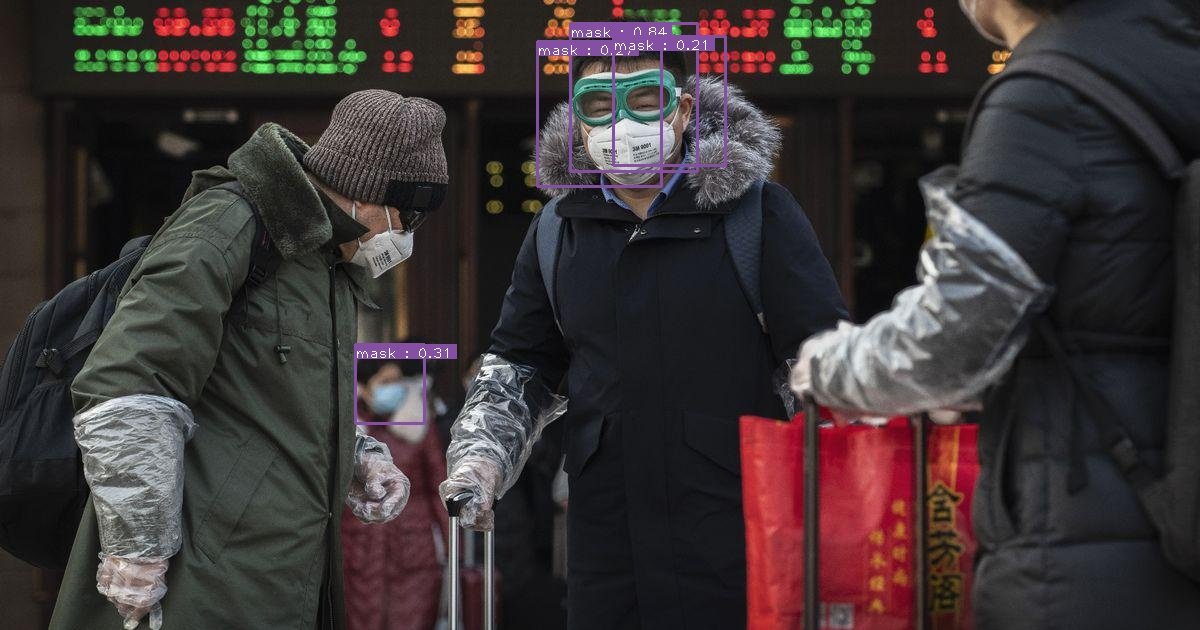

In [27]:
from IPython.display import Image
Image(filename='output.jpg')